In [1]:
from pathlib import Path
#import pandas as pd
#from vsd_cancer.functions import cancer_functions as canf
import sys
import numpy as np
import os

In [2]:
top_dir = Path(r"R:\home\firefly_link\cancer")

data_dir = Path(top_dir, "analysis", "full")
viewing_dir = Path(top_dir, "analysis", "full", "tif_viewing")

In [3]:
def lab2masks(seg):
    '''
    This function turns a labelled segmentation into a 3D array of individual cell masks

    Parameters
    ----------
    seg : 2D int array shape (m,n)
        Segmentation where each cell labelled by an integer 1-k.
        0 where no cells are segmented

    Returns
    -------
    masks: 3D int array shape (k,m,n), ints of 0 or 1.
        Kth slice returns an array with True where the kth segmentation segmented.

    '''
    masks = []
    for i in range(1,seg.max()+1):
        masks.append((seg == i).astype(int))
    return np.array(masks)

In [4]:
from cellpose import plot, utils, io
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import matplotlib
#import f.plotting_functions as pf
#import f.general_functions as gf

save_dir = Path(r'C:\Users\Firefly\Desktop\cell line images')

trial_strings = [
    'cancer_20201219_slip2_area1_long_acq_corr_long_acq_blue_0.0318_green_0.0772_heated_to_37_1',
    'cancer_cancer20220309_slip5_area2_long_acq_cancer20220309_slip5_area2_long_acq_blue_0.112_green_0.0673_L453_1',
    'cancer_cancer20220310_slip6_area3_long_acq_cancer20220310_slip6_area3_long_acq_blue_0.112_green_0.0673_L468_1',
    'cancer_cancer20220308_slip1_area4_long_acq_cancer20220308_slip1_area4_long_acq_blue_0.112_green_0.0673_LBT474_1',
    'cancer_cancer20220223_slip1_area2_long_acq_cancer20220223_slip1_area2_long_acq_blue_0.112_green_0.0673_LCal51_1',
    'cancer_20210313_slip5_area3_long_acq_MCF10A_TGFB_37deg_long_acq_blue_0.06681_green_0.07975_1',
    'cancer_20210313_slip6_area2_long_acq_corr_MCF10A_37deg_long_acq_blue_0.06681_green_0.07975_1',
    'cancer_cancer20220216_slip2_area5_long_acq_cancer20220216_slip2_area5_long_acq_blue_0.112_green_0.0673_LHs578t_1',
    'cancer_cancer20220222_slip1_area1_long_acq_cancer20220222_slip1_area1_long_acq_blue_0.112_green_0.0673_LSUM159_1',
    'cancer_cancer20220309_slip3_area1_long_acq_cancer20220309_slip3_area1_long_acq_blue_0.112_green_0.0673_LT47D_1'
]
im_scalebar_length_um = 100

C:\Users\Firefly\anaconda3\envs\cellpose\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


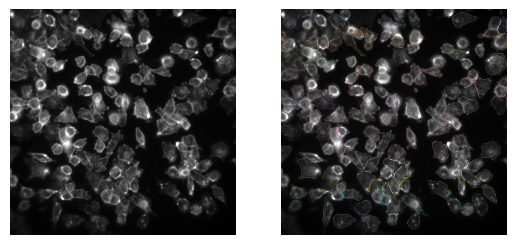

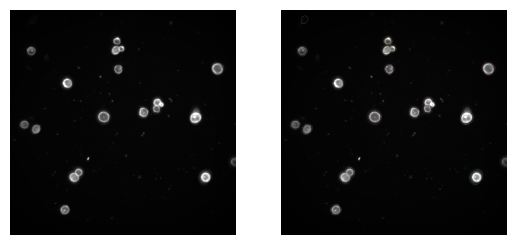

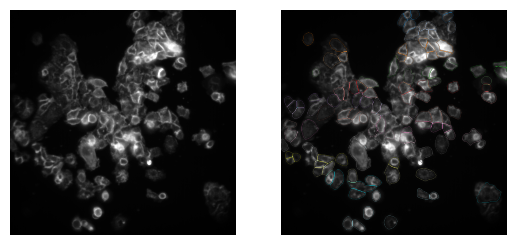

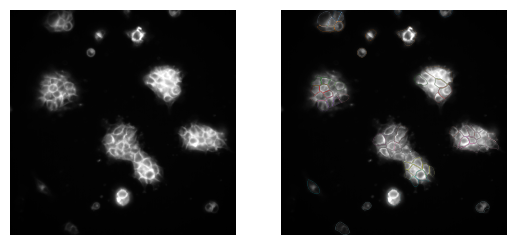

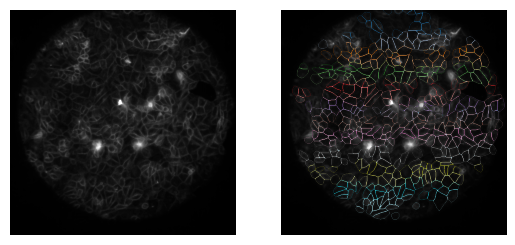

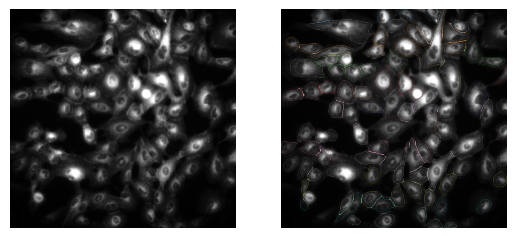

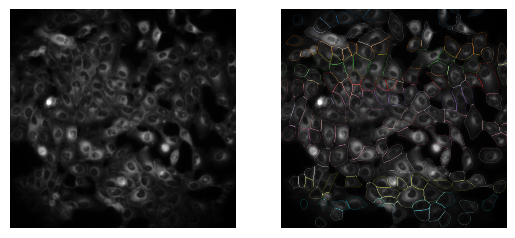

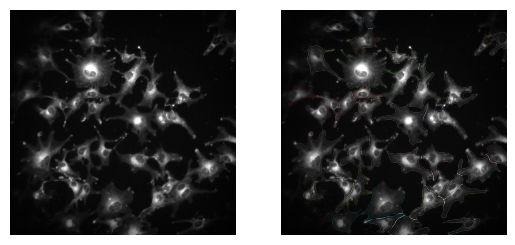

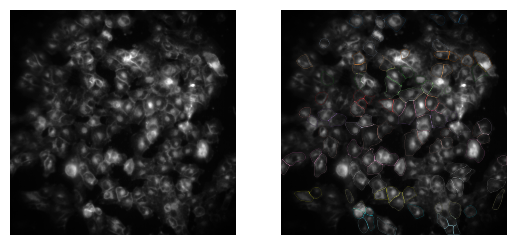

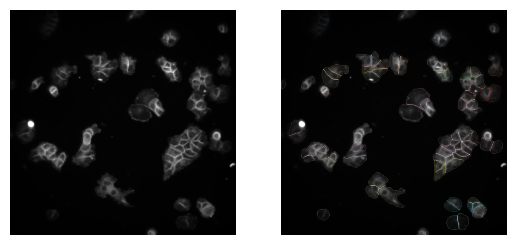

In [16]:
for trial_string in trial_strings:
    trial_save = Path(data_dir, "ratio_stacks", trial_string)
    im = np.load(Path(trial_save, f"{trial_string}_im.npy"))
    seg = np.load(Path(trial_save, f"{trial_string}_seg.npy"))

    masks = lab2masks(seg)
    outlines = np.array([np.logical_xor(mask,ndimage.morphology.binary_dilation(mask)) for mask in masks]).astype(int)
    outlines *= np.arange(outlines.shape[0]+1)[1:,None,None] 
    outlines = np.ma.masked_less(outlines,1)
    overlay = matplotlib.cm.tab20(np.sum(outlines,0)/outlines.shape[0])
    
    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(gf.norm(im), vmax=0.6, cmap="Greys_r")
    ax[1].imshow(gf.norm(im), vmax=0.6, cmap="Greys_r")
    ax[1].imshow(overlay)
    for a in ax:
        a.axis("off")
    fig.savefig(
            Path(save_dir, f"{trial_string}_rois.eps"), format = 'eps',bbox_inches="tight", dpi=300
        )

In [5]:
from cellpose import models, io

for trial_string in trial_strings:
    trial_save = Path(data_dir, "ratio_stacks", trial_string)
    im = np.load(Path(trial_save, f"{trial_string}_im.npy"))
    
    channels = [0,0]
    model = models.Cellpose(model_type='cyto')
    masks, flows, styles, diams = model.eval(im, diameter=None, channels=channels)
    filename = Path(save_dir, f'{trial_string}')
    io.masks_flows_to_seg(im, masks, flows, diams, filename, channels)
    #io.save_to_png(im, masks, flows, f'{trial_string}')

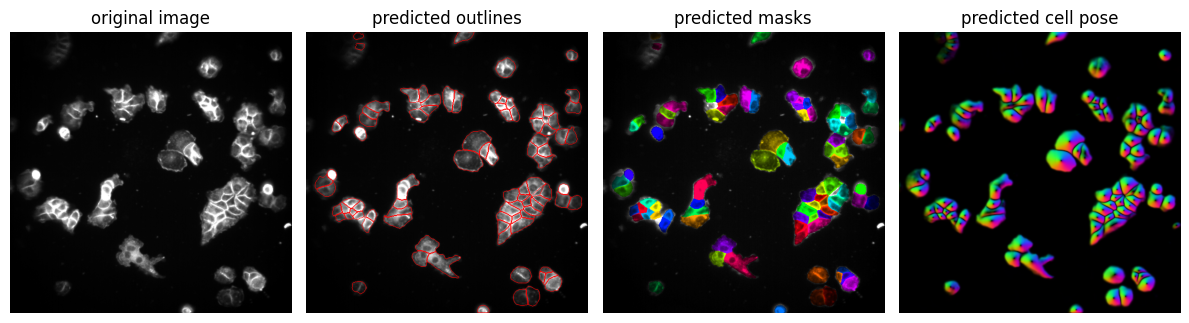

In [6]:
# DISPLAY RESULTS
from cellpose import plot
chan = [0,0]
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, im, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [25]:
def norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))

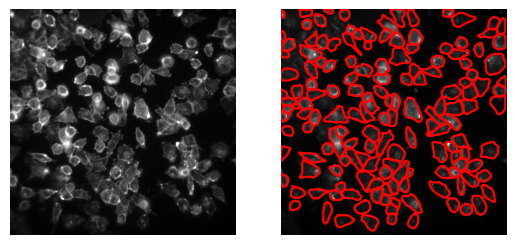

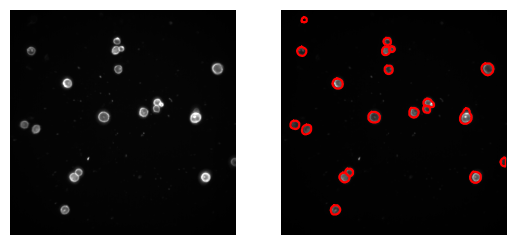

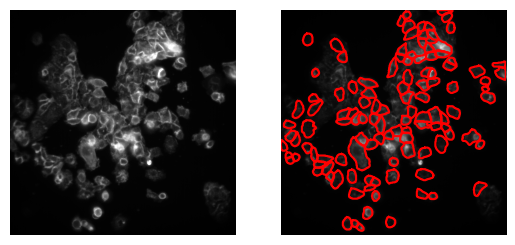

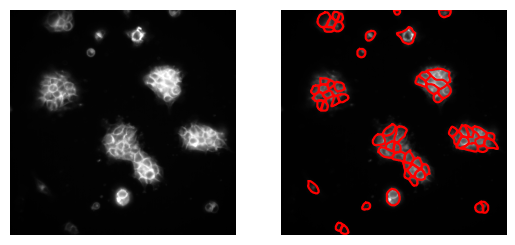

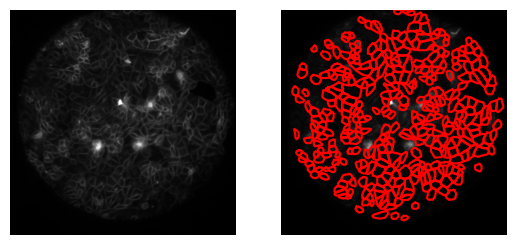

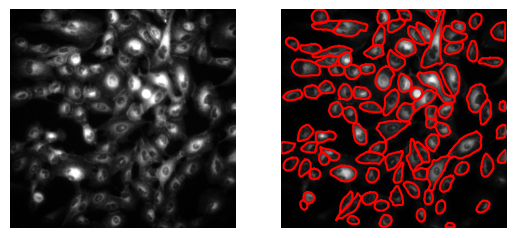

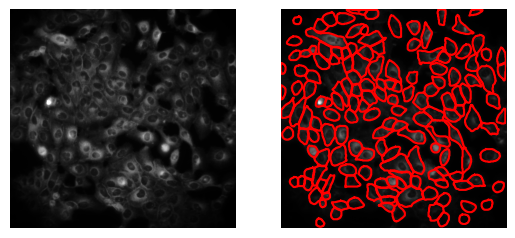

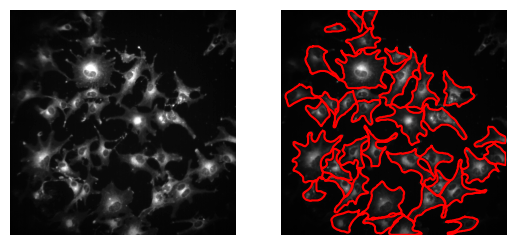

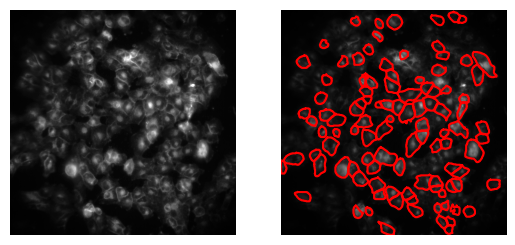

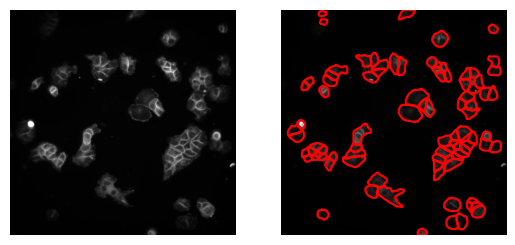

In [28]:
trials = [
    'cancer_20201219_slip2_area1_long_acq_corr_long_acq_blue_0.0318_green_0',
    'cancer_cancer20220309_slip5_area2_long_acq_cancer20220309_slip5_area2_long_acq_blue_0.112_green_0',
    'cancer_cancer20220310_slip6_area3_long_acq_cancer20220310_slip6_area3_long_acq_blue_0.112_green_0',
    'cancer_cancer20220308_slip1_area4_long_acq_cancer20220308_slip1_area4_long_acq_blue_0.112_green_0',
    'cancer_cancer20220223_slip1_area2_long_acq_cancer20220223_slip1_area2_long_acq_blue_0.112_green_0',
    'cancer_20210313_slip5_area3_long_acq_MCF10A_TGFB_37deg_long_acq_blue_0.06681_green_0',
    'cancer_20210313_slip6_area2_long_acq_corr_MCF10A_37deg_long_acq_blue_0.06681_green_0',
    'cancer_cancer20220216_slip2_area5_long_acq_cancer20220216_slip2_area5_long_acq_blue_0.112_green_0',
    'cancer_cancer20220222_slip1_area1_long_acq_cancer20220222_slip1_area1_long_acq_blue_0.112_green_0',
    'cancer_cancer20220309_slip3_area1_long_acq_cancer20220309_slip3_area1_long_acq_blue_0.112_green_0'
]
i = 0
for i in range(len(trials)):
    
    trial = trials[i]
    trial_string = trial_strings[i]
    trial_save = Path(data_dir, "ratio_stacks", trial_string)
    im = np.load(Path(trial_save, f"{trial_string}_im.npy"))
    seg = np.load(Path(r'C:\Users\Firefly', f"{trial}_seg.npy"), allow_pickle = True).item()
    dat = seg
    # plot image with masks overlaid
    mask_RGB = plot.mask_overlay(dat['img'], dat['masks'],
                            )

    # plot image with outlines overlaid in red
    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(norm(im), vmax=0.6,  cmap="Greys_r")
    #plt.figure()
    outlines = utils.outlines_list(dat['masks'])
    
    for o in outlines:
        ax[1].plot(o[:,0], o[:,1], color='r')
    #plt.axis('off')
    ax[1].imshow(norm(dat['img']),cmap="Greys_r")
    for a in ax:
        a.axis("off")
    i += 1
    plt.savefig(Path(save_dir,f'{trial}_overlaid_combined.eps'), format = 'eps', dpi = 300)
    